## Carbon sources
A normal thing to do is to change the carbon sources in the medium and seeing what happens. Let's try!

In [1]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

In [2]:
model = read_sbml_model('data/yeastGEM_het.xml')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

carbon = []
carbon_names = []

for reaction in model.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            carbon.append(reaction.id)
            carbon_names.append(reaction.name) 
            
# Second, we can establish the baseline case for later reference
with model:
    max_base_growth = model.slim_optimize()
    model.objective = model.reactions.R07215
    max_base_production = model.slim_optimize()

    
# Now, we will loop through every carbon source in the model and see how good it produces.     
# We define the lists we are going to be using
max_growth = []
max_production = []
medium=model.medium

with model:
    for reaction in carbon:
        medium['r_1714'] = 0
        medium[reaction]=1
        model.medium = medium
        with model:
            max_growth.append(model.slim_optimize(error_value=0.))
            model.objective = model.reactions.R07215
            max_production.append(model.slim_optimize(error_value=0.))  # Determining max production
            medium[reaction]=0
            #print(medium)
        

# We can now collect all of the data in a dataframe
production = {'Carbon': carbon_names,
             'Growth': max_growth,
             'Production': max_production}
df = pd.DataFrame(production, columns = ['Carbon', 'Growth', 'Production'])
print(df)


                            Carbon    Growth  Production
0    (1->3)-beta-D-glucan exchange  0.083748    0.041173
1           (R)-carnitine exchange  0.000000    0.000000
2             (R)-lactate exchange  0.031737    0.015422
3          (R)-mevalonate exchange  0.000000    0.000000
4        (R)-pantothenate exchange  0.000000    0.000000
..                             ...       ...         ...
235               tyrosol exchange  0.000000    0.000000
236       tyrosyl acetate exchange  0.000000    0.000000
237     methionyl acetate exchange  0.000000    0.000000
238        propyl acetate exchange  0.000000    0.000000
239      ethyl propionate exchange  0.000000    0.000000

[240 rows x 3 columns]


                            Carbon        Growth  Production
0    (1->3)-beta-D-glucan exchange  8.374779e-02    0.041173
2             (R)-lactate exchange  3.173700e-02    0.015422
7             (S)-lactate exchange  3.173700e-02    0.015422
8              (S)-malate exchange  3.677760e-02    0.017927
15      2-isopropylmalate exchange -3.669041e-19    0.000000
..                             ...           ...         ...
215  N-acetyl-L-glutamate exchange  8.422467e-02    0.040785
225       ethyl hexanoate exchange  1.054836e-01    0.050700
226       ethyl octanoate exchange  1.492065e-01    0.070994
227       ethyl butanoate exchange  7.351592e-02    0.035495
230              propanal exchange  2.131799e-02    0.011050

[132 rows x 3 columns]


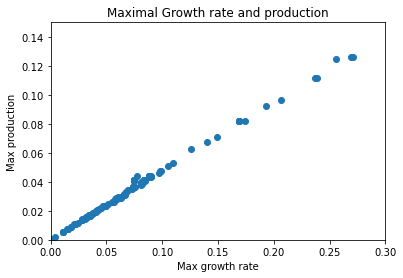

In [18]:
df= df[df['Growth'] != 0]
print(df)
# And we can create a scatterplot of the production over growth to view the distrubution
plt.scatter(df.get('Growth'), df.get('Production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max production')
plt.xlim(0, 0.3)
plt.ylim(0, 0.15)
plt.title('Maximal Growth rate and production')
plt.savefig("figures/carbon_sources")
plt.show()

In [5]:
print(max_base_growth,max_base_production)

0.08374778664999781 0.04117342484804845


In [6]:
df.sort_values(by='Growth', ascending=False).head(15)


,Carbon,Growth,Production
132,stearate exchange,0.270976,0.125962
151,oleate exchange,0.269050,0.125962
164,alpha-maltotriose exchange,0.255689,0.124978
118,palmitate exchange,0.239125,0.111322
119,palmitoleate exchange,0.236505,0.111322
152,myristate exchange,0.206750,0.096682
67,glutathione disulfide exchange,0.192925,0.092158
109,laurate exchange,0.174611,0.082042
35,trehalose exchange,0.169284,0.082151
110,maltose exchange,0.169024,0.082151


In [ ]:
for reaction in model.reactions.query('sucrose exchange', 'name'):
    print(reaction.name)

In [22]:
medium=model.medium
medium['r_1714'] = 0
medium["r_2058"]=1
model.medium = medium
write_sbml_model(model, "data/yeastGEM_het_suc.xml")
model_sucrose = read_sbml_model('data/yeastGEM_het_suc.xml')
print(model_sucrose.medium)

{'r_1654': 1000.0, 'r_1832': 1000.0, 'r_1861': 1000.0, 'r_1992': 1000.0, 'r_2005': 1000.0, 'r_2020': 1000.0, 'r_2049': 1000.0, 'r_2058': 1.0, 'r_2060': 1000.0, 'r_2100': 1000.0, 'r_4593': 1000.0, 'r_4594': 1000.0, 'r_4595': 1000.0, 'r_4596': 1000.0, 'r_4597': 1000.0, 'r_4600': 1000.0}


In [16]:
model_sucrose.medium

{'r_1654': 1000.0,
 'r_1832': 1000.0,
 'r_1861': 1000.0,
 'r_1992': 1000.0,
 'r_2005': 1000.0,
 'r_2020': 1000.0,
 'r_2049': 1000.0,
 'r_2058': 1,
 'r_2060': 1000.0,
 'r_2100': 1000.0,
 'r_4593': 1000.0,
 'r_4594': 1000.0,
 'r_4595': 1000.0,
 'r_4596': 1000.0,
 'r_4597': 1000.0,
 'r_4600': 1000.0}

In [19]:
#general information:
with model_sucrose:
    model_sucrose.objective = model_sucrose.reactions.R07215
    print(model_sucrose.optimize().objective_value)
    with model_sucrose:
        model_sucrose.objective = model_sucrose.reactions.R07215
        DH_production = model.optimize().objective_value
        print("Max. 7-DH production [mmol gDW^-1 h^-1]:", DH_production)
        print("Theoretical max. yield [mmol-7-DH / mmol-sucrose]:", DH_production / (-1*model_sucrose.reactions.r_2058.flux))

0.08215115009687664
Max. 7-DH production [mmol gDW^-1 h^-1]: 0.08374770604149133
Theoretical max. yield [mmol-7-DH / mmol-glucose]: 0.08374770604149133
